<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")

df.describe()
df.isnull().any()
df.isna().any()

Gender    False
Height    False
Weight    False
dtype: bool

In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

df2 = df.dropna()
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 312.5+ KB


In [6]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

In [8]:
df2 = df
df2['sexo'] = df2['Gender'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino'  )
df2['altura'] = df2['Height'].apply(lambda x : x/39,97)
df2['peso'] = df['Weight'].apply(lambda x : x/2.205)
df2 = df2[['sexo','altura','peso']]
df2



,sexo,altura,peso
0,masculino,1.893513,109.702296
1,masculino,1.763639,73.610192
2,masculino,1.900259,96.481114
3,masculino,1.839256,99.792504
4,masculino,1.791841,93.582676
...,...,...,...
9995,femenino,1.696735,62.030591
9996,femenino,1.719671,77.491114
9997,femenino,1.637641,58.265451
9998,femenino,1.770109,74.309506


In [9]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape

(10000, 3)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

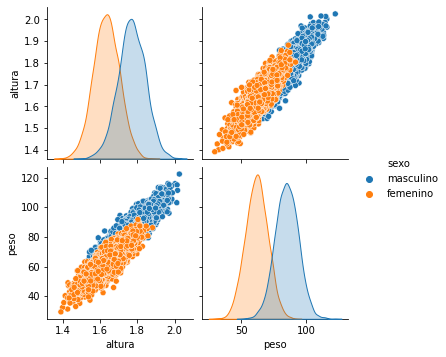

In [10]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

sns.pairplot(df2,  hue = 'sexo')


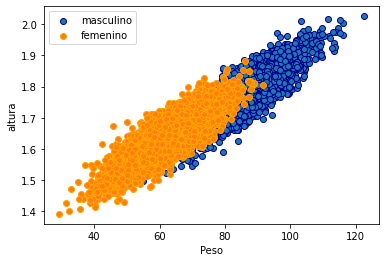

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df2[df2['sexo'] == 'masculino']['peso'], df2[df2['sexo'] == 'masculino']['altura'], edgecolors='darkBlue', label='masculino')
ax.scatter(df2[df2['sexo'] == 'femenino']['peso'], df2[df2['sexo'] == 'femenino']['altura'] , edgecolors='orange', label='femenino' )
ax.set_xlabel('Peso')
ax.set_ylabel('altura')
ax.legend()
plt.show()

In [12]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
print("Altura promedio {} "   .format(df2[df2['sexo'] == 'masculino']['altura'].mean()))

Altura promedio 1.7699063052876263 


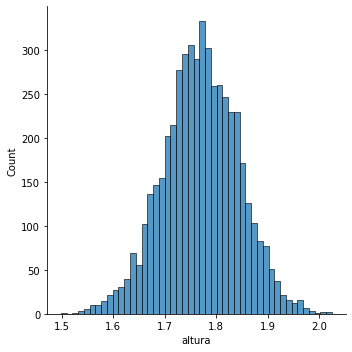

In [13]:
sns.displot(df2[df2['sexo'] == 'masculino']['altura'])
plt.show()

c:\users\patricio\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


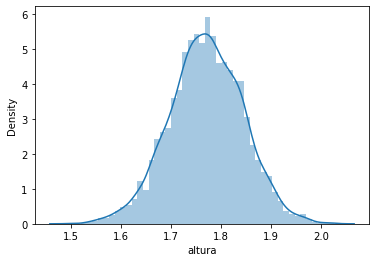

In [14]:
sns.distplot(df2[df2['sexo'] == 'masculino']['altura'])
plt.show()

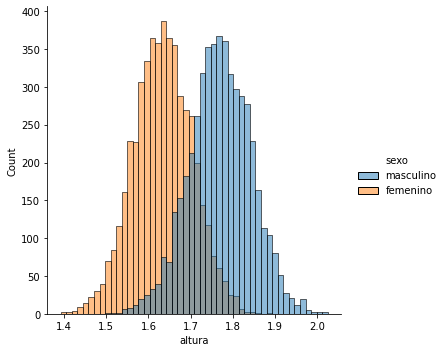

In [15]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(df2, x='altura', hue='sexo')
plt.show()

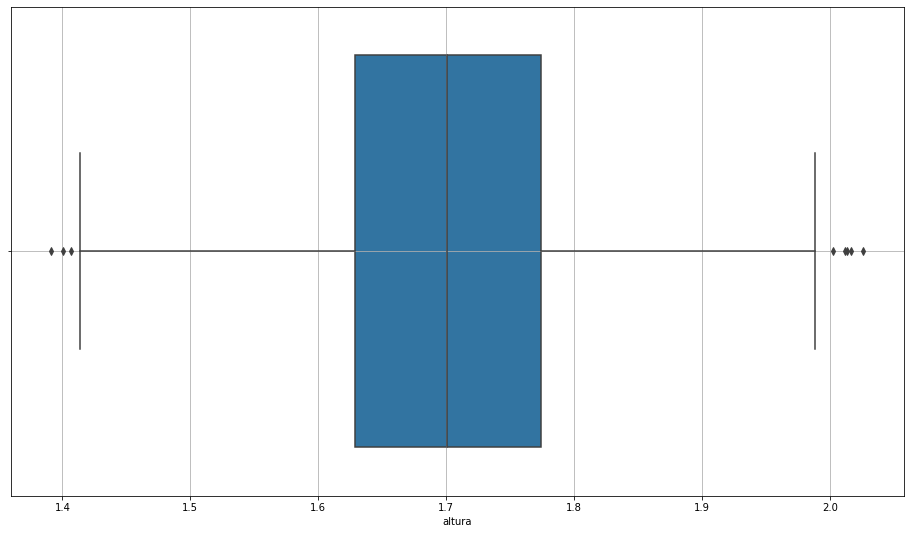

In [16]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df2['altura'], ax=ax)
ax.grid('dashed')

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [17]:
df3 = df2[df2['sexo'] == 'masculino']

X = df3[['altura']].to_numpy()

y = df3['peso']



In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42 )

In [19]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
y_hat.shape


(1500,)

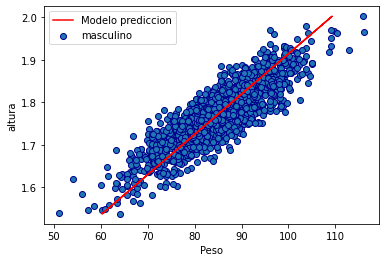

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(y_test , X_test, edgecolors='darkBlue', label='masculino')
ax.plot(y_hat , X_test , color = 'red', label ='Modelo prediccion')
ax.set_xlabel('Peso')
ax.set_ylabel('altura')
ax.legend()
plt.show()

In [21]:
df4 = df2[df2['sexo'] == 'femenino']
X_f = df4[['altura']].to_numpy()
y_f = df4['peso']

In [22]:
from sklearn.model_selection import train_test_split

X_trainf , X_testf , y_trainf , y_testf = train_test_split(X_f , y_f , test_size = 0.3 , random_state = 42 )

In [23]:
from sklearn import linear_model

lrf = linear_model.LinearRegression()
lrf.fit(X_f , y_f)
y_hatf = lrf.predict(X_testf)

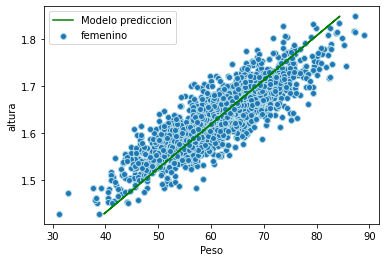

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(y_testf , X_testf, edgecolors='lightblue', label='femenino')
ax.plot(y_hatf , X_testf , color = 'green', label ='Modelo prediccion')
ax.set_xlabel('Peso')
ax.set_ylabel('altura')
ax.legend()
plt.show()

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_hat)
scoref = r2_score(y_testf, y_hatf)
print (f"Coeficiente de determinación masculino: {score :.2f}")
print (f"Coeficiente de determinación femenin: {scoref :.2f}")



Coeficiente de determinación masculino: 0.75
Coeficiente de determinación femenin: 0.73


In [26]:
from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test, y_hat)
#base_r2 = r2_score(y_test, y_train)
#print (f"Promediador: coeficiente de determinación: { base_r2 :.2f} ")
print (f"Regresión: coeficiente de determinación: { lr_r2 :.2f} ")

Regresión: coeficiente de determinación: 0.75 


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
import gradio as gr

def peso(altura,sexo):
    
    if sexo == "Masculino":
        row_data = np.array([altura])
        peso = lr.predict([row_data])[0]
        return f"Peso estimado {peso:.2f}, Sexo {sexo}"
    
    if sexo == "Femenino":
        row_data = np.array([altura])
        peso = lrf.predict([row_data])[0]
        return f"Peso estimado {peso:.2f}, Sexo {sexo}"
        

iface = gr.Interface(
    fn=peso,
    inputs=[gr.inputs.Slider(1.5, 2.3) , gr.inputs.Dropdown(["Masculino" , "Femenino"])],
    outputs="text",
    layout="vertical")

iface.launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...
